In [ ]:
#IMPORTAR LIBRERIAS
#Tratamiento de datos
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels.api as sm

#Graficar
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

#Modelado
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/AirPassengers.csv")
print(datos.shape)
datos.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
datos['Month']=pd.to_datetime(datos['Month'], infer_datetime_format=True)
datos.set_index(['Month'],inplace=True)
datos.rename(columns={'#Passengers':'Passengers'},inplace=True)
datos.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


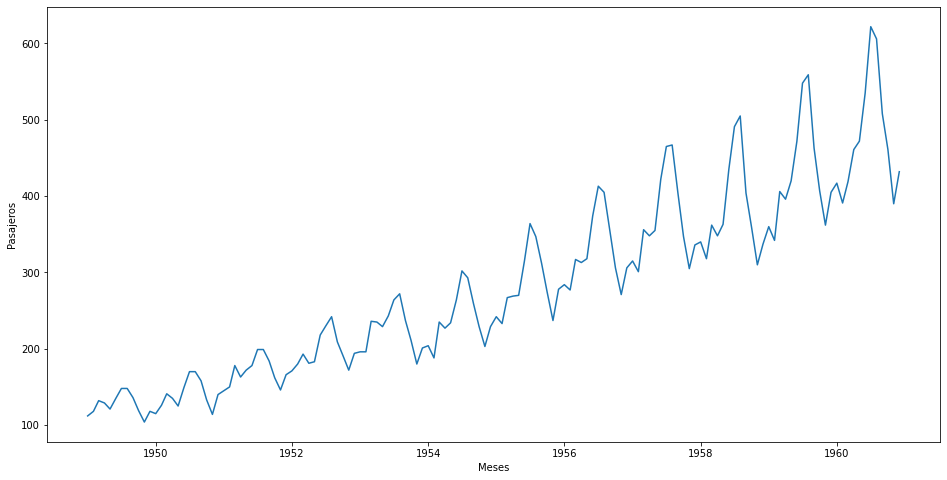

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.plot(datos)
plt.show()

In [ ]:
##Indentificar estacionariedad por mecanismos graficos
mediaMovil=datos.rolling(window=12).mean()
desviacionMediaMovil=datos.rolling(window=12).std()

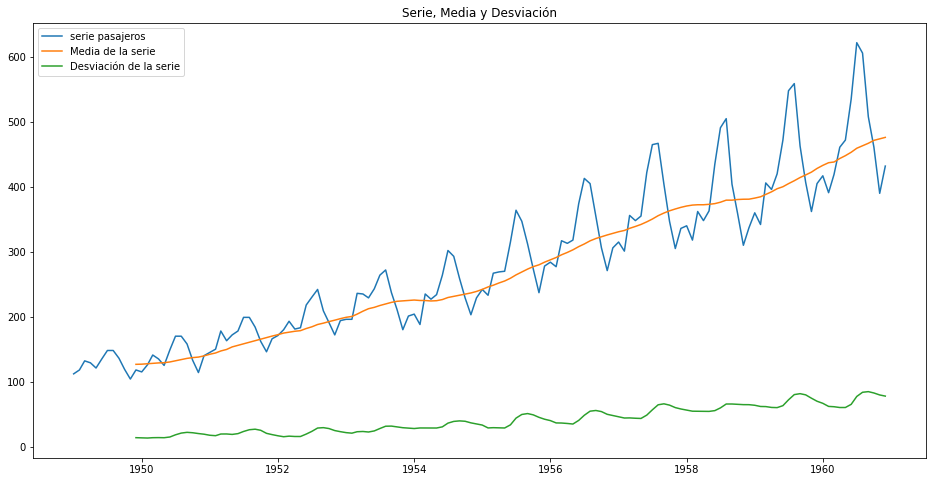

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(datos,label='serie pasajeros')
plt.plot(mediaMovil,label='Media de la serie')
plt.plot(desviacionMediaMovil,label='Desviación de la serie')
plt.legend(loc='best')
plt.title('Serie, Media y Desviación')
plt.show()

In [ ]:
print('Test de Dicket - Fuller:')
dftest=adfuller(datos['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Estadístico T','Valor p','Retrasos usados','Número de observaciones'])
for key, value , in dftest[4].items():
  dfoutput['valores críticos (%s)'%key]=value

print(dfoutput)
#no es estacionaria, pero no entiendo bien el por que

Test de Dicket - Fuller:
Estadístico T                0.815369
Valor p                      0.991880
Retrasos usados             13.000000
Número de observaciones    130.000000
valores críticos (1%)       -3.481682
valores críticos (5%)       -2.884042
valores críticos (10%)      -2.578770
dtype: float64


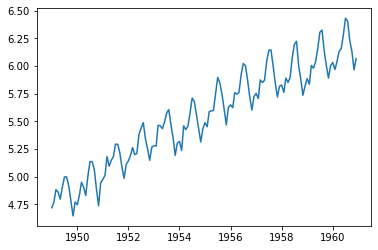

In [ ]:
#la transformamos para volverla estacionaria
#Aplicamos logaritmo
datosLog=np.log(datos)
plt.plot(datosLog)
plt.show()

In [ ]:
mediaMovilLog=datosLog.rolling(window=12).mean()
desviacionMediaMovilLog=datosLog.rolling(window=12).std()

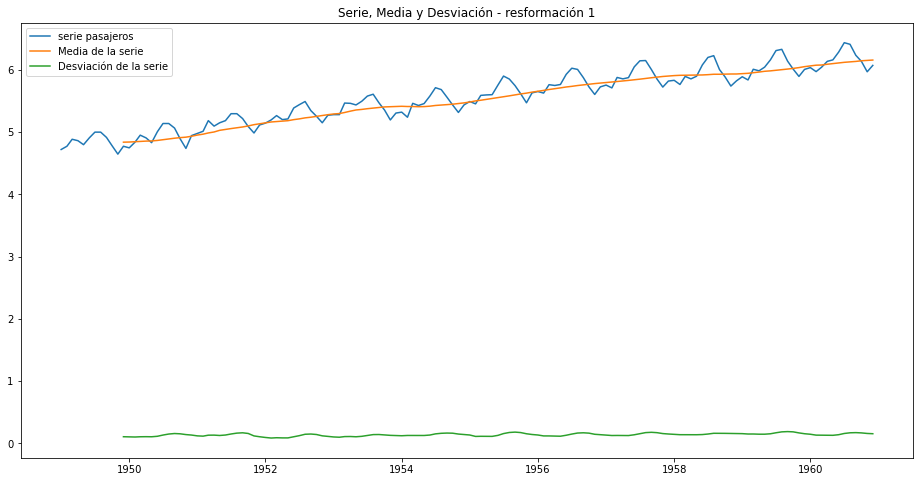

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(datosLog,label='serie pasajeros')
plt.plot(mediaMovilLog,label='Media de la serie')
plt.plot(desviacionMediaMovilLog,label='Desviación de la serie')
plt.legend(loc='best')
plt.title('Serie, Media y Desviación - resformación 1')
plt.show()

In [ ]:
print('Test de Dicket - Fuller:')
dftest=adfuller(datosLog['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Estadístico T','Valor p','Retrasos usados','Número de observaciones'])
for key, value , in dftest[4].items():
  dfoutput['valores críticos (%s)'%key]=value

print(dfoutput)
#todavia no es estacionaria, por lo que hay que seguirla transformando

Test de Dicket - Fuller:
Estadístico T               -1.717017
Valor p                      0.422367
Retrasos usados             13.000000
Número de observaciones    130.000000
valores críticos (1%)       -3.481682
valores críticos (5%)       -2.884042
valores críticos (10%)      -2.578770
dtype: float64


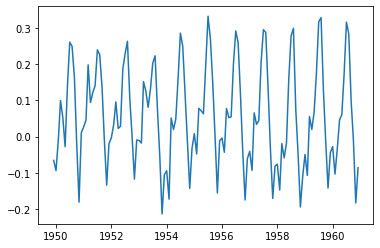

In [ ]:
datosDif=datosLog - mediaMovilLog
plt.plot(datosDif)
plt.show()

In [ ]:
print('Teste de Dickey - Fuller:')
dftest=adfuller(datosDif['Passengers'].dropna(),autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Estadistico T','Valor P','Retrasos usados','Númuero de observaciones'])
for key,value in dftest[4].items():
  dfoutput['Valores críticos (%s)'%key]=value
print(dfoutput)

Teste de Dickey - Fuller:
Estadistico T                -3.162908
Valor P                       0.022235
Retrasos usados              13.000000
Númuero de observaciones    119.000000
Valores críticos (1%)        -3.486535
Valores críticos (5%)        -2.886151
Valores críticos (10%)       -2.579896
dtype: float64


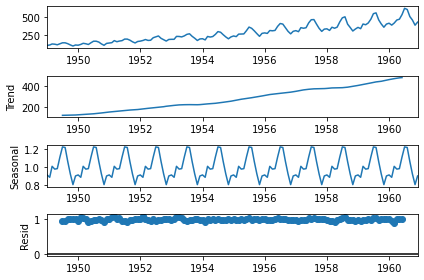

In [ ]:
#Descomposicion de la serie de tiempo
descomposicion = seasonal_decompose(datos,model='multiplicative')
grafica=descomposicion.plot()

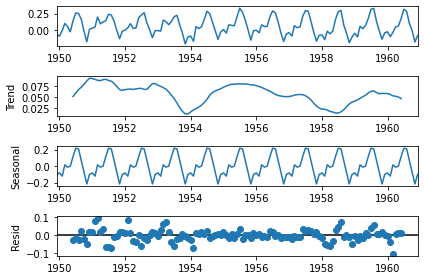

In [ ]:
#Descomposicion de la serie de tiempo
descomposicion = seasonal_decompose(datosDif.dropna())
grafica=descomposicion.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


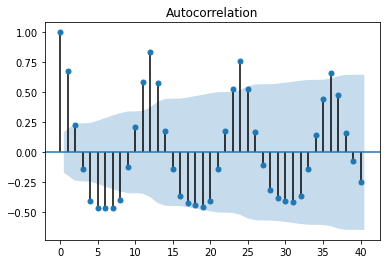

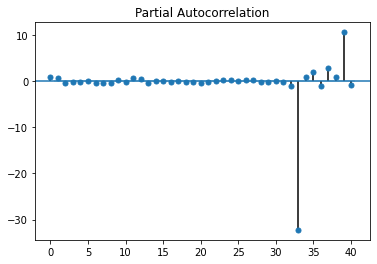

In [ ]:
##Modelo ARIMA
fig = sm.graphics.tsa.plot_acf(datosDif.dropna().values.squeeze(),lags=40)
fig = sm.graphics.tsa.plot_pacf(datosDif.dropna(),lags=40)

In [ ]:
modelo = ARIMA(datosDif.dropna(),order =(2,2,1))
modeloAjustado=modelo.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


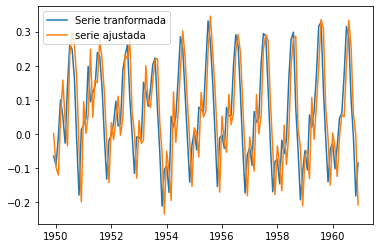

In [ ]:
plt.plot(datosDif.dropna(),label='Serie tranformada')
plt.plot(modeloAjustado.fittedvalues,label='serie ajustada')
plt.legend()
plt.show()

In [ ]:
ajustes=pd.DataFrame(modeloAjustado.fittedvalues)
ajustes=ajustes.rename(columns={0:'Passengers'})
ajustes

,Passengers
Month,
1949-12-01,0.000000
1950-01-01,-0.098241
1950-02-01,-0.121404
1950-03-01,0.045205
1950-04-01,0.157575
...,...
1960-08-01,0.333392
1960-09-01,0.252746
1960-10-01,0.058714


In [ ]:
predicciones=np.exp(ajustes + mediaMovilLog)
predicciones.dropna()

,Passengers
Month,
1949-12-01,125.986967
1950-01-01,114.450278
1950-02-01,112.442649
1950-03-01,133.559750
1950-04-01,150.010899
...,...
1960-08-01,637.725942
1960-09-01,592.880057
1960-10-01,493.411041


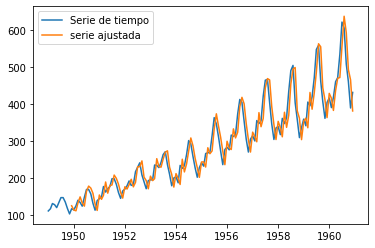

In [ ]:
plt.plot(datos,label='Serie de tiempo')
plt.plot(predicciones,label='serie ajustada')
plt.legend()
plt.show()

In [ ]:
#Suavizacion exponencial simple
m = 12
alfa = 1/(2*m)

In [ ]:
datos['SES']=SimpleExpSmoothing(datos['Passengers']).fit(smoothing_level=alfa,optimized=False,).fittedvalues
datos.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Passengers,SES
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.000000
1949-03-01,132,112.250000
1949-04-01,129,113.072917
1949-05-01,121,113.736545


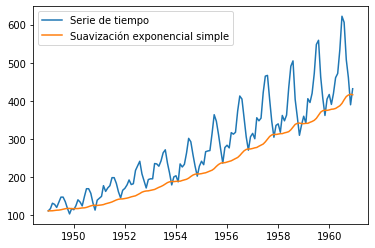

In [ ]:
plt.plot(datos['Passengers'],label='Serie de tiempo')
plt.plot(datos['SES'],label='Suavización exponencial simple')
plt.legend()
plt.show()

In [ ]:
#Suavización exponencial Holt - Winters A
datos['SEHW1']=ExponentialSmoothing(datos['Passengers'], trend='add').fit().fittedvalues
datos.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Passengers,SES,SEHW1
Month,,,
1949-01-01,112,112.000000,113.424104
1949-02-01,118,112.000000,113.474828
1949-03-01,132,112.250000,119.464366
1949-04-01,129,113.072917,133.477561
1949-05-01,121,113.736545,130.543312
